# Churn Predict 

## Import the librarys

In [1]:
# Let's start putting the data into colab environment
from google.colab import files
files.upload()

Saving churn.csv to churn (1).csv


{'churn.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,

In [2]:
! pip install shap

In [3]:
# library and Data Manipulation
import pandas as pd
import numpy as np 

# Visualization libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerLine2D

# Data preparation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, train
from sklearn.neural_network import MLPClassifier

# Evaluating the models
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn .metrics import roc_auc_score
# Finding the best parameter for the Machine Learning Model
from sklearn.model_selection import GridSearchCV

# SHAP Values
import shap

# Serializing the model 
import joblib

# Avoiding unnecessary messages
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [4]:
df = pd.read_csv('churn.csv')

## Preparing the dataset  

In [5]:
def treate_data(df):
  df['AgeGroup'] = df['Age'].apply(lambda x: 1 if x >=55  else 0)  
  df["AgeCategory"] = 'Adult'
  df.loc[df['Age'] >= 55, 'AgeCategory'] ='Senior'
  df.loc[df['Age'] <= 25, 'AgeCategory'] = 'Young'
  df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
  return df

In [6]:
def get_dummies(df):
  Products = pd.get_dummies(df['NumOfProducts'])
  Geo = pd.get_dummies(df['Geography'])
  df = pd.concat([df, Products, Geo], axis=1)
  return df

In [7]:
def delete(df):
  df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'AgeCategory'], axis=1)
  return df

In [8]:
df = (df.
    pipe(treate_data).
    pipe(get_dummies).
    pipe(delete))
    

In [9]:
df1 = df[["CreditScore", "Gender","Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", 
          "EstimatedSalary", 1, 2	,3,	4,'France',	'Germany'	,'Spain', "Exited"]] #"AgeCategory"


In [10]:
df1.columns

Index([    'CreditScore',          'Gender',             'Age',
                'Tenure',         'Balance',   'NumOfProducts',
             'HasCrCard',  'IsActiveMember', 'EstimatedSalary',
                       1,                 2,                 3,
                       4,          'France',         'Germany',
                 'Spain',          'Exited'],
      dtype='object')

In [11]:
df.columns

Index([    'CreditScore',          'Gender',             'Age',
                'Tenure',         'Balance',   'NumOfProducts',
             'HasCrCard',  'IsActiveMember', 'EstimatedSalary',
                'Exited',        'AgeGroup',                 1,
                       2,                 3,                 4,
                'France',         'Germany',           'Spain'],
      dtype='object')

# Spiltting the features

In [12]:
y = df1['Exited']
X = df1.drop(['Exited'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Balancing the classes

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
#Lembrete só aplica over/under sampling nos dados de treinamento
sampling = RandomOverSampler()

In [15]:
X_train_sampled, y_train_sampled = sampling.fit_resample(X_train, y_train)

## Evaluating the model

In [53]:
# split the train and the test
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42) 

# Choosing the models
models = {'KNN':               KNeighborsClassifier(),  
          'Extra Tree':        ExtraTreesClassifier(),  
          'Random Forest':     RandomForestClassifier(),   
          'XGBoost':           XGBClassifier(), 
          'AdaBoost':          AdaBoostClassifier(),  
          'Gradient Boosting': GradientBoostingClassifier(),  
          'Redes Neurais':     MLPClassifier()}  
          
# evaluating the models
for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train_sampled, y_train_sampled)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall:    {recall_score(y_test, y_pred)*100}%")
  print(f"F1:        {f1_score(y_test, y_pred)*100}%")
  print('---------------------------------')

KNN
Acccuracy: 55.81818181818182%
Precision: 20.87205146533238%
Recall:    45.41213063763608%
F1:        28.599412340842314%
---------------------------------
Extra Tree
Acccuracy: 86.45454545454545%
Precision: 73.7864077669903%
Recall:    47.27838258164852%
F1:        57.6303317535545%
---------------------------------
Random Forest
Acccuracy: 85.84848484848486%
Precision: 66.0%
Recall:    56.45412130637636%
F1:        60.85498742665549%
---------------------------------
XGBoost
Acccuracy: 80.33333333333333%
Precision: 49.69387755102041%
Recall:    75.73872472783826%
F1:        60.01232285890327%
---------------------------------
AdaBoost
Acccuracy: 79.18181818181819%
Precision: 47.83889980353634%
Recall:    75.73872472783826%
F1:        58.63937387116195%
---------------------------------
Gradient Boosting
Acccuracy: 80.81818181818183%
Precision: 50.518672199170126%
Recall:    75.73872472783826%
F1:        60.609831985065334%
---------------------------------
Redes Neurais
Acccuracy:

### Training the best model

In [17]:
model =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [18]:
# Check the best parameters
model.fit(X,y) 
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall:    {recall_score(y_test, y_pred)*100}%")
print(f"F1-Score:  {f1_score(y_test, y_pred)*100}%")

Acccuracy: 20.21212121212121%
Precision: 19.571865443425075%
Recall:    99.53343701399689%
F1-Score:  32.71147457193969%


Founding the [best parameters](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae)

In [19]:
print('Hyperparameters currently in use:\n')
pprint(model.get_params())

Hyperparameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


### Making the prediction

### Checking the mertrics 

In [20]:
# Check the best parameters
#model = RandomForestClassifier(bootstrap='True',  criterion='gini',  max_features= 5, min_samples_split= 3,  n_estimators= 100)
model.fit(X,y) 
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall:    {recall_score(y_test, y_pred)*100}%")
print(f"F1:        {f1_score(y_test, y_pred)*100}%")

Acccuracy: 20.21212121212121%
Precision: 19.571865443425075%
Recall:    99.53343701399689%
F1:        32.71147457193969%


In [21]:
confusion_matrix(y_pred= y_pred, y_true = y_test)
print(classification_report(y_pred= y_pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.90      0.01      0.02      2657
           1       0.20      1.00      0.33       643

    accuracy                           0.20      3300
   macro avg       0.55      0.50      0.17      3300
weighted avg       0.76      0.20      0.08      3300



In [22]:
from sklearn.metrics import plot_confusion_matrix

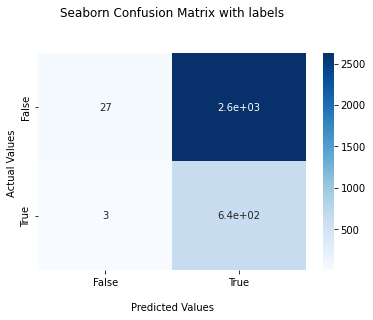

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

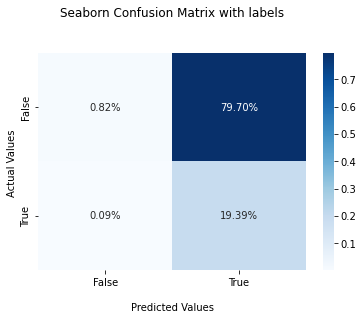

In [24]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Here we start to find the best parameters. Let's improve:

* Learning_rate
* n_estimators 
* max_depth 
* min_samples_split 
* min_samples_leaf 
* max_features

### Learning Rate

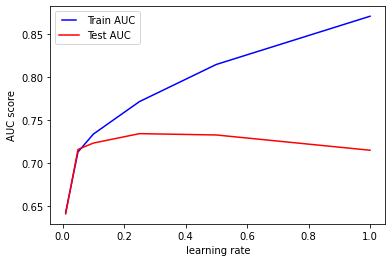

In [28]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
#plotting the best parameters
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

### N_Estimators

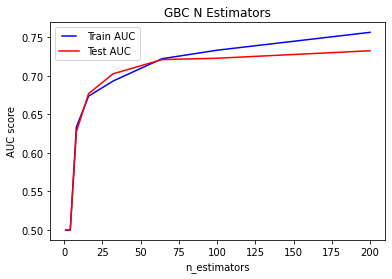

In [29]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for eta in n_estimators:
   model = GradientBoostingClassifier(n_estimators=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
#plotting the best parameters
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.title("GBC N Estimators")
plt.show()

### Max_depths

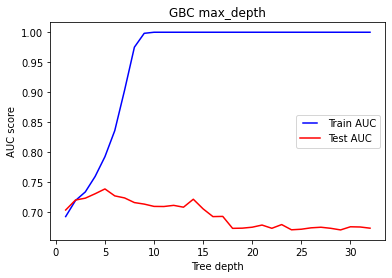

In [30]:
# 
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
#
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
#plotting the best parameters
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.title("GBC max_depth")
plt.show()

### min_samples_split

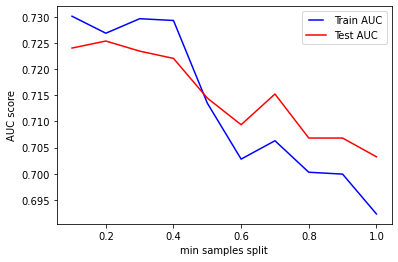

In [31]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

### min_samples_leaf

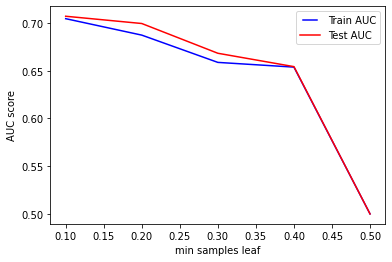

In [32]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()


### max_features

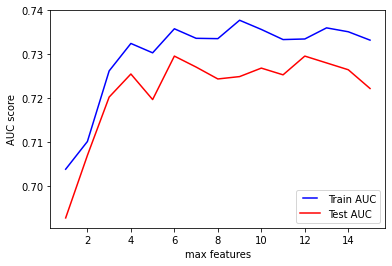

In [33]:
max_features = list(range(1,X_train.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

# Update of best parameters

In [44]:
model_final =GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, max_depth=5, min_samples_split=0.2, min_samples_leaf= 0.1, max_features=12)
model_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features=12,
                           min_samples_leaf=0.1, min_samples_split=0.2,
                           n_estimators=50)

In [45]:
# Check the best parameters
model_final.fit(X,y) 
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall:    {recall_score(y_test, y_pred)*100}%")
print(f"F1-Score:  {f1_score(y_test, y_pred)*100}%")

Acccuracy: 86.87878787878788%
Precision: 75.60975609756098%
Recall:    48.21150855365474%
F1-Score:  58.87939221272555%


In [34]:
# https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0

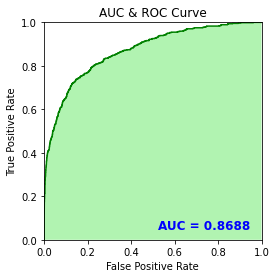

In [52]:
y_pred1 = model.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred1)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred1)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Explorying the model prediction with SHAP

In [35]:
feature_dict = dict(enumerate(df.drop("Exited", 1).columns))

In [36]:
# Let's try to explain the model with shap values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

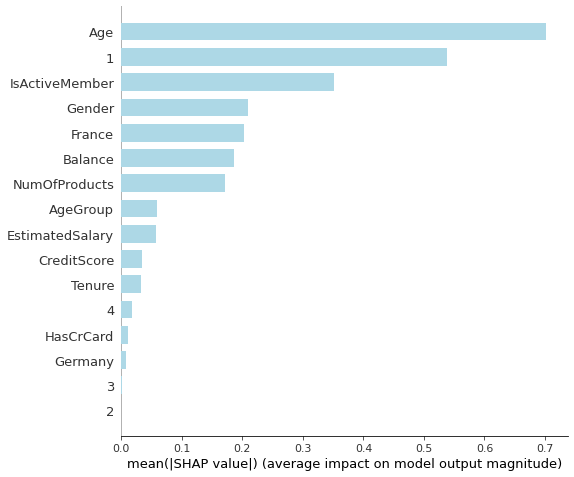

In [37]:
shap.summary_plot(shap_values, X_test, feature_names = list(feature_dict.values()), plot_type = "bar", color = "lightblue")

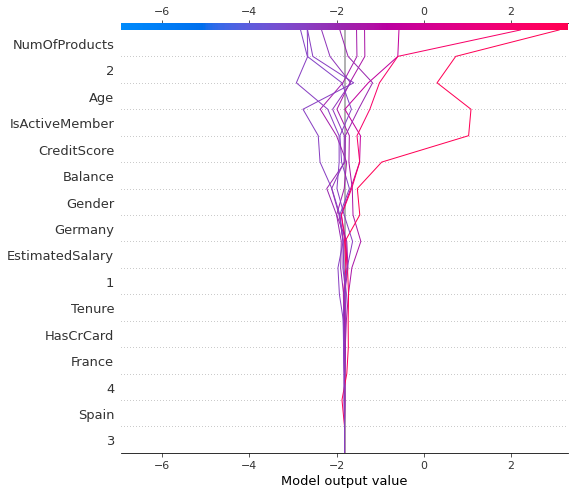

In [38]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns))

## Exporting the model

In [39]:
import joblib

In [48]:
modelo = {
'model': model_final, 
'features_modelo': list(X_train.columns)
}

In [49]:
joblib.dump(modelo, 'modelo.pickle')

['modelo.pickle']

In [42]:
modelo = joblib.load('modelo.pickle')

# Verifying the version of each packpage
 Don't forget to use the code <br>
 `pip install -r requirements.txt`


In [43]:
! pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.0
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.28
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed=